In [1]:
#Pattern Recognition Project - 1st deliverable
#Theodoros Lioupis 9733
#Evgenia Stavrianidou 9686

In [2]:
#imports
#!pip install numpy 
#!pip install matplotlib
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#data given
m1 = [0.4,0.8]
m2 = [1.5,2.7]

S = np.array([1.5,0,0,0.8])
S = S.reshape(2,2)
var1 = S[0,0]
var2 = S[1,1]
s1 = math.sqrt(var1)
s2 = math.sqrt(var2)

pw1 = 0.95
pw2 = 0.05

Text(0, 0.5, 'Probability Density')

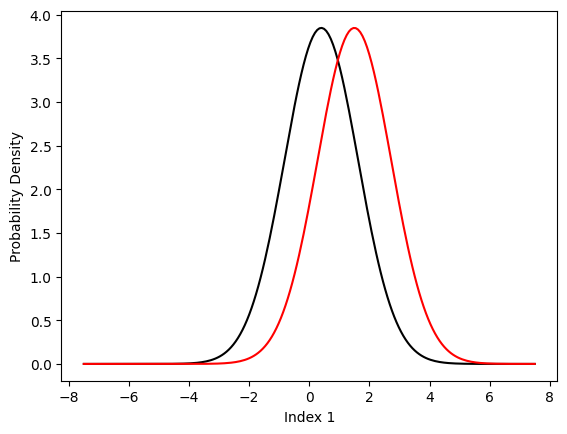

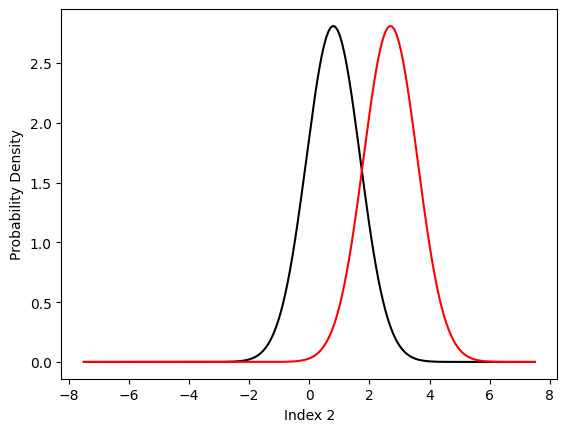

In [7]:
#Question 1
# Creating a series of data of in range of -7.5 to 7.5.
x = np.linspace(-7.5,7.5,200)
 
#Creating a function to calculate Y~N
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
 
#Apply function to the data.

#Both medical indeces for w1
pdf_w1_i1 = normal_dist(x,m1[0],s1) #index 1
pdf_w1_i2 = normal_dist(x,m1[1],s2) #index 2
#Both medical indeces for w2
pdf_w2_i1 = normal_dist(x,m2[0],s1) #index 1
pdf_w2_i2 = normal_dist(x,m2[1],s2) #index 2
 
#Plotting the Results for w1(Healthy) and w2(cancer) for index 1
plt.figure(1)
plt.plot(x,pdf_w1_i1 , color = 'black')
plt.plot(x,pdf_w2_i1 , color = 'red')
plt.xlabel('Index 1')
plt.ylabel('Probability Density')
#Plotting the Results for w1(Healthy) and w2(cancer) for index 2
plt.figure(2)
plt.plot(x,pdf_w1_i2 , color = 'black')
plt.plot(x,pdf_w2_i2 , color = 'red')
plt.xlabel('Index 2')
plt.ylabel('Probability Density')
